In [16]:
!pip install umap-learn hdbscan
!pip install finance-datareader
!pip install -U finance-datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 1.7 MB/s eta 0:00:00


In [11]:
import numpy as np
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
import hdbscan
from sklearn.preprocessing import StandardScaler, RobustScaler

In [20]:
import FinanceDataReader as fdr
df_krx = fdr.StockListing('KRX')
df_krx.head(3)

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,77600,2,-2000,-2.51,78300,78700,76300,31317563,2423649194900,463255125880000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,173300,2,-9000,-4.94,177200,178500,169500,7545976,1309025865050,126162809854500,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,367000,2,-10000,-2.65,372000,372000,364500,143664,52758029500,85878000000000,234000000,STK


In [21]:
df = fdr.DataReader('005930','2020-01-01', '2024-03-31')    # 삼성전자
df.head(3)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000


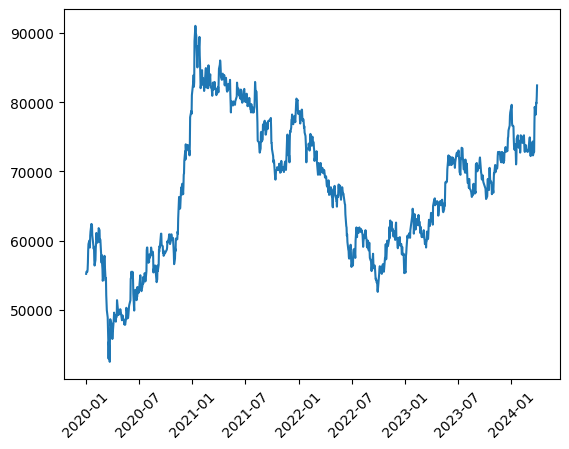

In [26]:
plt.plot(df['Close'])
plt.xticks(rotation=45)
plt.show()

In [50]:
# 정규화
scaler = RobustScaler()
df_scale =  pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

# 모델 훈련
clusterer = hdbscan.HDBSCAN(min_cluster_size=20)    # 파라미터에 따라 매물대 개수 달라짐
df["dbscan_cluster"] = clusterer.fit_predict(np.array(df_scale['Close']).reshape(-1, 1))
len(df["dbscan_cluster"].unique())

10

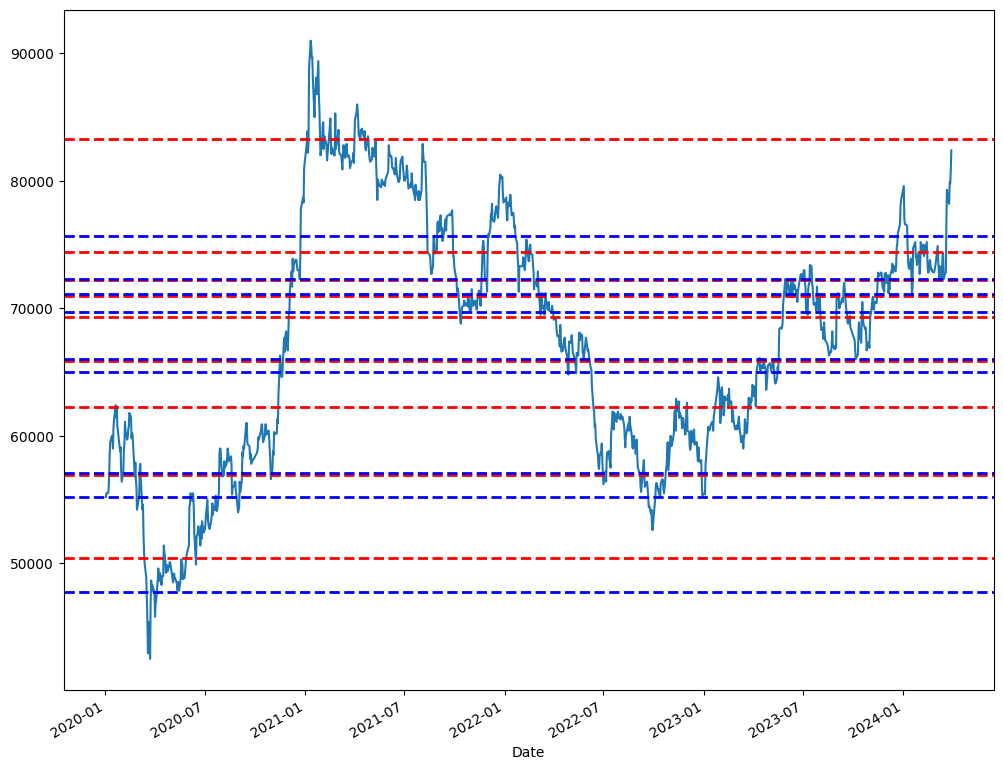

In [51]:
temp = df.copy()
temp['Close'].plot(figsize=(12, 10))
for n in temp["dbscan_cluster"].unique():
    if n != -1:
        plt.axhline(temp[temp['dbscan_cluster']==n]['Close'].max(), color='red', linestyle='--', linewidth=2)
        plt.axhline(temp[temp['dbscan_cluster']==n]['Close'].min(), color='blue', linestyle='--', linewidth=2)